Dataset Head:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


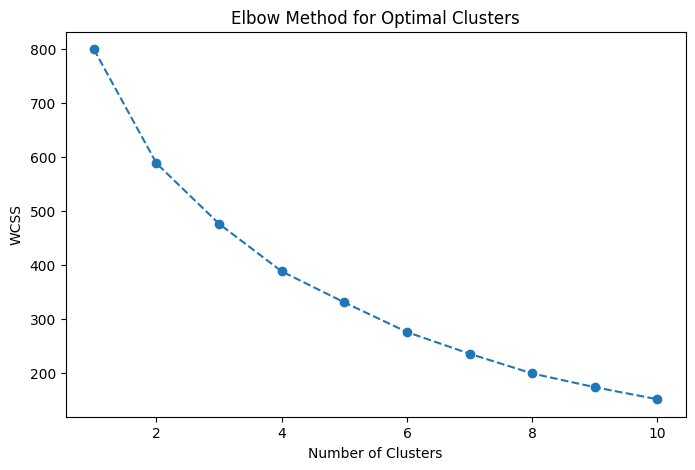

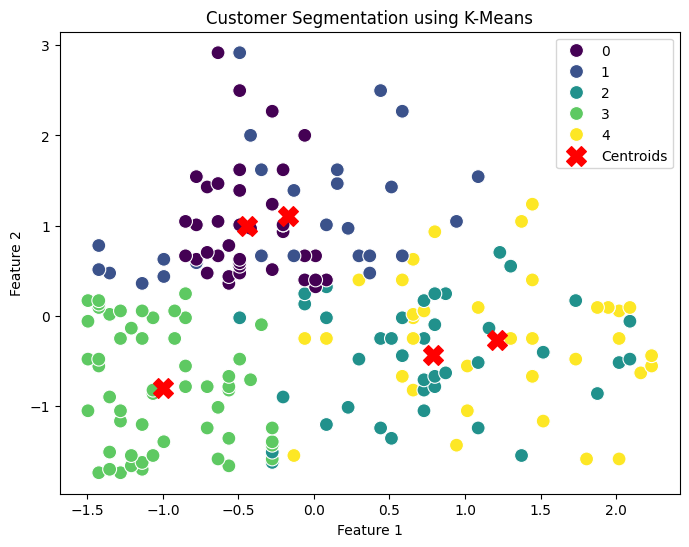

Cluster Distribution:
 Cluster
3    54
2    43
0    39
4    35
1    29
Name: count, dtype: int64


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = r"C:\Users\gnana\Desktop\jupyter\Mall_Customers1\Mall_Customers.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print("Dataset Head:\n", df.head())

# Select relevant features (modify as needed)
if 'CustomerID' in df.columns:
    df = df.drop(columns=['CustomerID'])  # Remove ID column if present

# Handling categorical columns (if any)
df = pd.get_dummies(df, drop_first=True)

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Applying K-Means Clustering (Choose optimal clusters based on Elbow Method)
optimal_clusters = 5  # Adjust based on the elbow method result
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizing the clusters (only if 2D is possible)
if df_scaled.shape[1] >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=df['Cluster'], palette='viridis', s=100)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Customer Segmentation using K-Means")
    plt.legend()
    plt.show()

# Display cluster counts
print("Cluster Distribution:\n", df['Cluster'].value_counts())
